<a href="https://colab.research.google.com/github/L-Machado/AnaliseDataSet/blob/main/BigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das Bibliotecas

As bibliotecas usadas foram:


*   Pandas;
*   Matplot;
*   Seaborn;
*   Google.colab.

Suas funções são respectivamente:
*   Pandas - Usado para manipular o Dataset;
*   Matplot - Usado para criar os gráficos para apresentação de resultados;
*   Seaborn - Possui função semelhante ao Matplot, porem tem uma maior diversidade para plotagem de gráficos;
*   Google.colab - Usado para fazer upload do meu Dataset.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 20240121_shopee_sample_data (1).csv to 20240121_shopee_sample_data (1).csv


# Escolha do Dataset

A escolha do conjunto de dados foi baseada em vendas da Shopee. Nossa intenção foi identificar o perfil de vendedor que busca atingir o estado com maior volume de compras, vendendo na categoria com maior número de produtos vendidos

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['20240121_shopee_sample_data (1).csv']))

In [ ]:
df.head()



,price_ori,delivery,item_category_detail,specification,title,w_date,link_ori,item_rating,seller_name,idElastic,price_actual,sitename,idHash,total_rating,id,total_sold,pict_link,favorite,timestamp,desc
0,25.80,"KL City, Kuala Lumpur",Shopee | Women's Bags | Shoulder Bags | Should...,Product Specifications Category Shopee Women's...,1081 PU SLING BAG KULIT leather Casual Beg Tan...,2023-04-27,https://shopee.com.my/1081-PU-SLING-BAG-KULIT-...,4.9,qqfwholesale,19ec9fdedd9fe3e14bc652950fc3c423,12.90,shopee,88f051f0a2dcf0d29191e0175b828938,179,88f051f0a2dcf0d29191e0175b828938,179,https://down-my.img.susercontent.com/file/my-1...,Favorite (128,1682553600000,🎉 WELCOME To QQF WHOLESALE \r\n😍 ALL item read...
1,1.41,NaN,Shopee | Home Appliances | Sewing Machines | S...,Product Specifications Category Shopee Home Ap...,Stat Chinese Traditional Frog Buttons Knot Che...,2023-04-27,https://shopee.com.my/Stat-Chinese-Traditional...,5.0,stationery.my,5322309be3b6d9c01d15fa19f5b7ad9a,0.75,shopee,472d22f58af3bb35cf28c6eed7088dc5,17,472d22f58af3bb35cf28c6eed7088dc5,17,https://down-my.img.susercontent.com/file/4147...,Favorite (19,1682553600000,Chinese Traditional Frog Buttons Knot Cheongsa...
2,8.50,"KL City, Kuala Lumpur",Shopee | Women's Bags | Handbags | Set Handbags,Product Specifications Category Shopee Women's...,N09 READY STOCK MYFOOYIN woman handbag set 2in...,2023-04-26,https://shopee.com.my/N09-READY-STOCK-MYFOOYIN...,4.9,fooyin88,7a36765d1e2ca2b6a5414ddfeedfefc3,8.50,shopee,ec6ce64f4b77efb38b6392818959f181,8.1k,ec6ce64f4b77efb38b6392818959f181,8.1k,https://down-my.img.susercontent.com/file/23da...,Favorite (21.5k,1682467200000,READY STOCK\nMEASUREMENT:\nLONG 26CM X HEIGHT ...
3,8.70,NaN,Shopee | Women Clothes | Maternity Wear | Inne...,Product Specifications Category Shopee Women C...,🔥Shocking Sale🔥Cotton Comfort Nursing Bra Brea...,2023-04-26,https://shopee.com.my/%F0%9F%94%A5Shocking-Sal...,4.9,vivi2002,7fc4ab69722e4f788f217b4c044f83eb,8.70,shopee,ef4e0e17fdc7d0125d8609dcc395bc3d,6.5k,ef4e0e17fdc7d0125d8609dcc395bc3d,6.5k,https://down-my.img.susercontent.com/file/df47...,Favorite (3.4k,1682467200000,PRODUCT DESCRIPTION\nMaterial:95%Cotton+5%Span...
4,3999.00,"KL City, Kuala Lumpur",Shopee | Cameras & Drones | DSLR Cameras | DSLRs,Product Specifications Category Shopee Cameras...,Canon EOS 70D 18-55mm IS STM Original+64gb+ext...,2023-04-26,https://shopee.com.my/Canon-EOS-70D-18-55mm-IS...,5.0,xpro.gadget,55608f901f4c5384f884de18227d4298,2739.00,shopee,568c2029fed7d22973ff96d0404a8ff8,10,568c2029fed7d22973ff96d0404a8ff8,10,https://down-my.img.susercontent.com/file/4d3a...,Favorite (132,1682467200000,Canon 70D\nHighlights\nEF-S 18-55mm f/3.5-5.6 ...


# Alterando a Base de Dados

Primeiramente, removemos todos os valores NaN (Not a Number) da nossa base de dados, pois esses valores podem interferir na análise e não podem ser processados adequadamente.

In [ ]:
df.dropna()

,price_ori,delivery,item_category_detail,specification,title,w_date,link_ori,item_rating,seller_name,idElastic,price_actual,sitename,idHash,total_rating,id,total_sold,pict_link,favorite,timestamp,desc
0,25.8,"KL City, Kuala Lumpur",Shopee | Women's Bags | Shoulder Bags | Should...,Product Specifications Category Shopee Women's...,1081 PU SLING BAG KULIT leather Casual Beg Tan...,2023-04-27,https://shopee.com.my/1081-PU-SLING-BAG-KULIT-...,4.9,qqfwholesale,19ec9fdedd9fe3e14bc652950fc3c423,12.90,shopee,88f051f0a2dcf0d29191e0175b828938,179,88f051f0a2dcf0d29191e0175b828938,179,https://down-my.img.susercontent.com/file/my-1...,Favorite (128,1682553600000,🎉 WELCOME To QQF WHOLESALE \r\n😍 ALL item read...
2,8.5,"KL City, Kuala Lumpur",Shopee | Women's Bags | Handbags | Set Handbags,Product Specifications Category Shopee Women's...,N09 READY STOCK MYFOOYIN woman handbag set 2in...,2023-04-26,https://shopee.com.my/N09-READY-STOCK-MYFOOYIN...,4.9,fooyin88,7a36765d1e2ca2b6a5414ddfeedfefc3,8.50,shopee,ec6ce64f4b77efb38b6392818959f181,8.1k,ec6ce64f4b77efb38b6392818959f181,8.1k,https://down-my.img.susercontent.com/file/23da...,Favorite (21.5k,1682467200000,READY STOCK\nMEASUREMENT:\nLONG 26CM X HEIGHT ...
4,3999.0,"KL City, Kuala Lumpur",Shopee | Cameras & Drones | DSLR Cameras | DSLRs,Product Specifications Category Shopee Cameras...,Canon EOS 70D 18-55mm IS STM Original+64gb+ext...,2023-04-26,https://shopee.com.my/Canon-EOS-70D-18-55mm-IS...,5.0,xpro.gadget,55608f901f4c5384f884de18227d4298,2739.00,shopee,568c2029fed7d22973ff96d0404a8ff8,10,568c2029fed7d22973ff96d0404a8ff8,10,https://down-my.img.susercontent.com/file/4d3a...,Favorite (132,1682467200000,Canon 70D\nHighlights\nEF-S 18-55mm f/3.5-5.6 ...
6,19.0,"KL City, Kuala Lumpur",Shopee | Others | Fengshui & Religious Supplies,Product Specifications Category Shopee Others ...,贺加福 （新）九品莲花大悲咒/30.5cmX30.5cm/正背彩色/莲花纸/1包6色/1色2...,2023-04-26,https://shopee.com.my/%E8%B4%BA%E5%8A%A0%E7%A6...,5.0,hokarhock,160d66bd6367d2eb88c6cd8cbfa8de85,19.00,shopee,de28753a7ba4ec8b40b184a62da006fe,17,de28753a7ba4ec8b40b184a62da006fe,17,https://down-my.img.susercontent.com/file/my-1...,Favorite (11,1682467200000,贺加福\r\n（新）九品莲花大悲咒\r\n30.5cmX30.5cm\r\n一色20张， 一...
8,11.0,"KL City, Kuala Lumpur",Shopee | Men Clothes | Traditional Wear | Bottoms,Product Specifications Category Shopee Men Clo...,Fashion Men's Sheer Thong Low Rise Stretch G-S...,2023-04-24,https://shopee.com.my/Fashion-Men%27s-Sheer-Th...,5.0,mrbunny.my,f95121639c00abd31d1e49c33428d7ff,5.50,shopee,76a30294ff1350e6d26885efa3188d02,17,76a30294ff1350e6d26885efa3188d02,17,https://down-my.img.susercontent.com/file/7654...,Favorite (34,1682294400000,"Details:* Tag Size: L~2XL, Please make sure th..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20288,300.0,"KL City, Kuala Lumpur",Shopee | Women's Bags | Backpacks | Mini Backp...,Product Specifications Category Shopee Women's...,David jones Paris women backpack pu leather pr...,2023-05-13,https://shopee.com.my/David-jones-Paris-women-...,5.0,davidjones.os,9b79446866af70b83c869e812c4498a8,91.90,shopee,2a56f85aa48e6521f2ec2547127f5a1e,267,2a56f85aa48e6521f2ec2547127f5a1e,267,https://down-my.img.susercontent.com/file/154d...,Favorite (882,1683936000000,Material: High Quality Soft PU Faux Leather\r\...
20289,216.0,"KL City, Kuala Lumpur",Shopee | Women's Bags | Backpacks | Mini Backp...,Product Specifications Category Shopee Women's...,Oxford Backpack Women Large Capacity Anti-Thef...,2023-05-13,https://shopee.com.my/Oxford-Backpack-Women-La...,4.9,hottyboy.my,2de7cd95c81bcd208e61df21a5d17bb9,93.00,shopee,93b6429047e8975329b72fd5808d9478,55,93b6429047e8975329b72fd5808d9478,55,https://down-my.img.susercontent.com/file/3a43...,Favorite (243,1683936000000,✅ Ready Stock & Ship within 1-24 hours!\r\n✅ D...
20294,122.0,"KL City, Kuala Lumpur",Shopee | Automotive | Car Accessories | Car Bed,Product Specifications Category Shopee Automot...,FULL SET Inflatable Car Bed Car Sofa Air

Agora, procedemos com a conversão do campo de data para o formato datetime, facilitando assim a análise temporal dos dados.

In [ ]:
df["w_date"] = pd.to_datetime(df["w_date"])
df["w_date"]

0       2023-04-27
1       2023-04-27
2       2023-04-26
3       2023-04-26
4       2023-04-26
           ...    
20307   2023-05-13
20308   2023-05-13
20309   2023-05-13
20310   2023-05-13
20311   2023-05-13
Name: w_date, Length: 20312, dtype: datetime64[ns]

Definimos o período de análise como todas as compras registradas durante o mês de abril de 2023.

In [63]:
DF_april = (df['w_date'].dt.year == 2023) & (df['w_date'].dt.month == 4)

In [ ]:
DF_april_data = df[DF_april]
DF_april_data

,price_ori,delivery,item_category_detail,specification,title,w_date,link_ori,item_rating,seller_name,idElastic,price_actual,sitename,idHash,total_rating,id,total_sold,pict_link,favorite,timestamp,desc
0,25.80,"KL City, Kuala Lumpur",Shopee | Women's Bags | Shoulder Bags | Should...,Product Specifications Category Shopee Women's...,1081 PU SLING BAG KULIT leather Casual Beg Tan...,2023-04-27,https://shopee.com.my/1081-PU-SLING-BAG-KULIT-...,4.9,qqfwholesale,19ec9fdedd9fe3e14bc652950fc3c423,12.90,shopee,88f051f0a2dcf0d29191e0175b828938,179,88f051f0a2dcf0d29191e0175b828938,179,https://down-my.img.susercontent.com/file/my-1...,Favorite (128,1682553600000,🎉 WELCOME To QQF WHOLESALE \r\n😍 ALL item read...
1,1.41,NaN,Shopee | Home Appliances | Sewing Machines | S...,Product Specifications Category Shopee Home Ap...,Stat Chinese Traditional Frog Buttons Knot Che...,2023-04-27,https://shopee.com.my/Stat-Chinese-Traditional...,5.0,stationery.my,5322309be3b6d9c01d15fa19f5b7ad9a,0.75,shopee,472d22f58af3bb35cf28c6eed7088dc5,17,472d22f58af3bb35cf28c6eed7088dc5,17,https://down-my.img.susercontent.com/file/4147...,Favorite (19,1682553600000,Chinese Traditional Frog Buttons Knot Cheongsa...
2,8.50,"KL City, Kuala Lumpur",Shopee | Women's Bags | Handbags | Set Handbags,Product Specifications Category Shopee Women's...,N09 READY STOCK MYFOOYIN woman handbag set 2in...,2023-04-26,https://shopee.com.my/N09-READY-STOCK-MYFOOYIN...,4.9,fooyin88,7a36765d1e2ca2b6a5414ddfeedfefc3,8.50,shopee,ec6ce64f4b77efb38b6392818959f181,8.1k,ec6ce64f4b77efb38b6392818959f181,8.1k,https://down-my.img.susercontent.com/file/23da...,Favorite (21.5k,1682467200000,READY STOCK\nMEASUREMENT:\nLONG 26CM X HEIGHT ...
3,8.70,NaN,Shopee | Women Clothes | Maternity Wear | Inne...,Product Specifications Category Shopee Women C...,🔥Shocking Sale🔥Cotton Comfort Nursing Bra Brea...,2023-04-26,https://shopee.com.my/%F0%9F%94%A5Shocking-Sal...,4.9,vivi2002,7fc4ab69722e4f788f217b4c044f83eb,8.70,shopee,ef4e0e17fdc7d0125d8609dcc395bc3d,6.5k,ef4e0e17fdc7d0125d8609dcc395bc3d,6.5k,https://down-my.img.susercontent.com/file/df47...,Favorite (3.4k,1682467200000,PRODUCT DESCRIPTION\nMaterial:95%Cotton+5%Span...
4,3999.00,"KL City, Kuala Lumpur",Shopee | Cameras & Drones | DSLR Cameras | DSLRs,Product Specifications Category Shopee Cameras...,Canon EOS 70D 18-55mm IS STM Original+64gb+ext...,2023-04-26,https://shopee.com.my/Canon-EOS-70D-18-55mm-IS...,5.0,xpro.gadget,55608f901f4c5384f884de18227d4298,2739.00,shopee,568c2029fed7d22973ff96d0404a8ff8,10,568c2029fed7d22973ff96d0404a8ff8,10,https://down-my.img.susercontent.com/file/4d3a...,Favorite (132,1682467200000,Canon 70D\nHighlights\nEF-S 18-55mm f/3.5-5.6 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3453,72.00,"KL City, Kuala Lumpur",Shopee | Women Clothes | Tops | Shirts & Blouses,Product Specifications Category Shopee Women C...,ZANZEA Women Full Sleeve Vintage Floral Printe...,2023-04-30,https://shopee.com.my/ZANZEA-Women-Full-Sleeve...,5.0,zanzea.os,df20bb401513d29e7745e46c6e927a61,36.00,shopee,adcf810618d7e98d57027bfe4e55611f,2.6k,adcf810618d7e98d57027bfe4e55611f,2.6k,https://down-my.img.susercontent.com/file/a7a1...,Favorite (2.3k,1682812800000,Package included:1 Shirts \nMaterial: Cotton\n...
3454,0.50,NaN,Shopee | Women Clothes | Others | Others,Product Specifications Category Shopee Women C...,🔥MURAHHH🔥 lelong mask extender getah | Shopee ...,2023-04-30,https://shopee.com.my/%F0%9F%94%A5MURAHHH%F0%9...,4.9,bearonlineshop2,fa9616c1f9a1c4e74b15bb412701ca00,0.50,shopee,59491960189096a632aa445f1639b744,165,59491960189096a632aa445f1639b744,165,https://down-my.img.susercontent.com/file/5524...,Favorite (152,1682812800000,Mask extender getah 50SEN 10cm - 11cm(boleh di...
3455,35.85,NaN,Shopee | Women Clothes | Others | Others,Product Specifications Category Shopee Women C...,Women Men Hoodie Fake Hem Skirt/ DIY Detachabl...,2023-04-30,https://shopee.com.my/Women-Men-Hoodie-Fake-He...,5.0,vetements.my

Criamos um gráfico para demonstrar o pico de vendas ao longo dos dias do mês de abril de 2023. Este gráfico nos permite visualizar claramente os dias em que ocorreram os maiores volumes de vendas durante esse período específico.

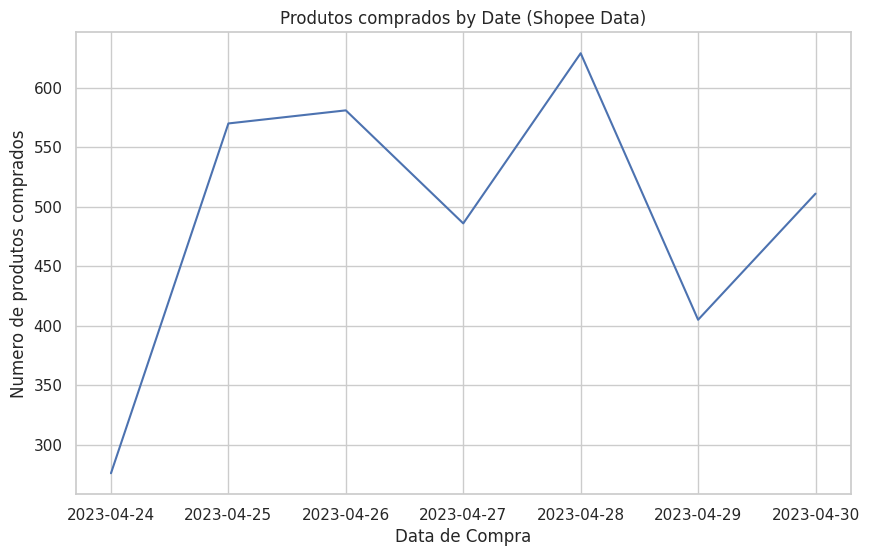

In [64]:
product_count_bydate = DF_april_data.groupby('w_date')['id'].count()
product_count_bydate
plt.figure(figsize=(10, 6))
plt.plot(product_count_bydate.index, product_count_bydate.values)
plt.xlabel('Data de Compra')
plt.ylabel('Numero de produtos comprados')
plt.title('Produtos comprados by Date (Shopee Data)')
plt.show()

Extraímos do conjunto de dados o estado que apresenta o maior volume de consumo de produtos durante o mês de abril de 2023. Esta análise nos permite identificar o estado onde há maior demanda por produtos vendidos na plataforma durante o período considerado.

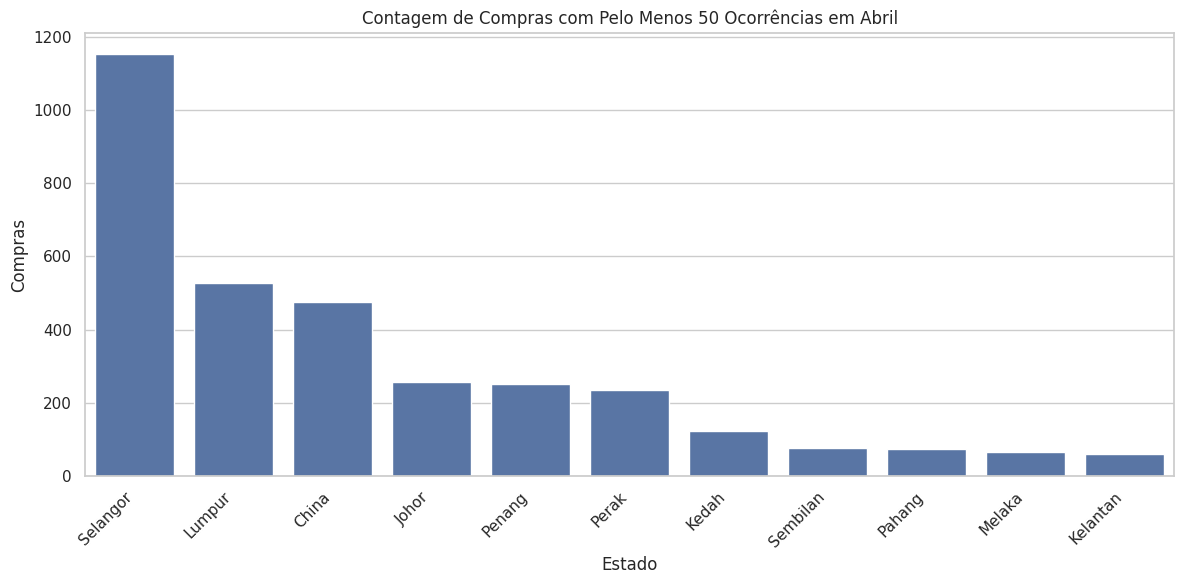

In [ ]:
def extract_state_from_spec(spec):
  if isinstance(spec, str):
    parts = spec.split('Ships From ')
    if len(parts) > 1:
        x = parts[-1].split(" ")
        return x[-1]
    else:
      return 'NA'
  else:
    return 'SEM INFORMACAO'
DF_april_data.loc[:, 'state'] = DF_april_data['specification'].apply(extract_state_from_spec)

sns.set(style="whitegrid")

state_counts = DF_april_data['state'].value_counts()
state_counts_filtered = state_counts[state_counts >= 50]

plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts_filtered.index, y=state_counts_filtered.values)

plt.title('Contagem de Compras com Pelo Menos 50 Ocorrências em Abril')
plt.xlabel('Estado')
plt.ylabel('Compras')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Por fim, identificamos a categoria que registrou o maior volume de vendas durante o mês de abril de 2023. Essa análise nos permite compreender quais tipos de produtos são os mais populares ou procurados pelos consumidores durante o período estudado.

Text(0, 0.5, 'Número de Vendas')

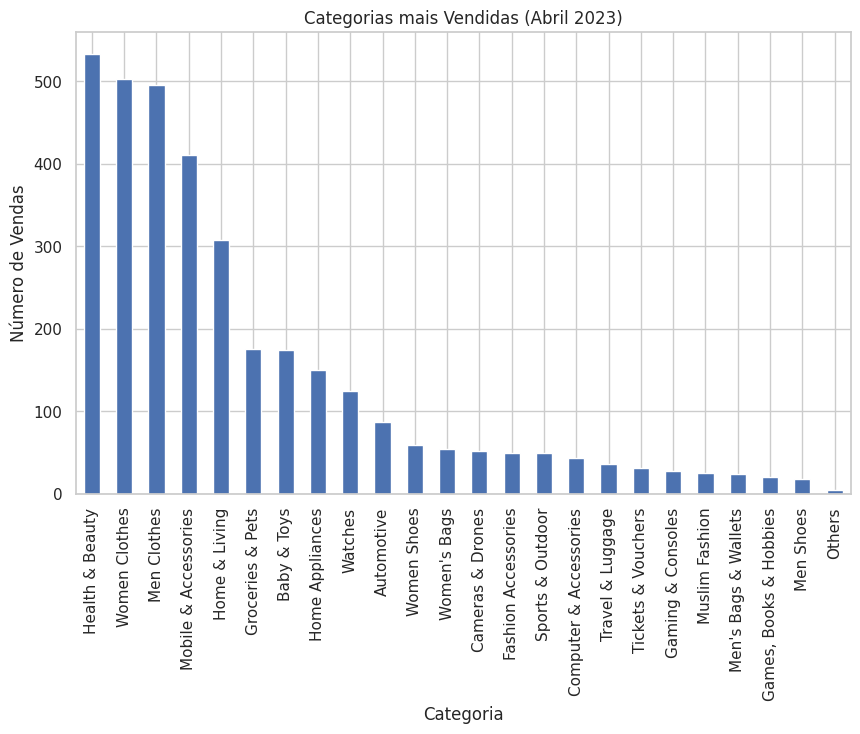

In [ ]:
def extract_main_category(category_detail):
    if pd.isna(category_detail):
        return 'NA'
    parts = category_detail.split('|')

    if len(parts) > 1:
        return parts[1].strip()
    else:
        return 'NA'

DF_april_data.loc[:, 'Main Category'] = DF_april_data['item_category_detail'].apply(extract_main_category)
main_category_counts = DF_april_data['Main Category'].value_counts()

plt.figure(figsize=(10, 6))
main_category_counts.plot(kind='bar')
plt.title('Categorias mais Vendidas (Abril 2023)')
plt.xlabel('Categoria')
plt.ylabel('Número de Vendas')